#what is a computer vision problem ?

where the oject is ,image recogination
here in this colab sheet we will be using CNN with Tensorflow and we will be using it over a binary detection/classification
and then futher we will be goining into  mmulticlassification problem



#What is CNN?
convultion neural network

*input layer
*convolution layers -extract the important features from the target images
*hidden layer _ Add non linearity to learn features.
*pooling Layer Reduces the dimentionality of leanrned image features
*Fully connected layer - Further refines learned features from convolution layers
*Output layer
*output activation  


> The data we are working on can get from https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

but this has a lot of food image we will be concentrating on two of images as we are doing binary classifications^to get that you canjust click on this link https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip



In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-27 14:26:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.207, 74.125.126.207, 74.125.132.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   145MB/s    in 0.7s    

2023-10-27 14:26:32 (145 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

we work with small datset so that we can buld more on it

# 'Inspect the data'
cruical step at the behinig is to understand the data in computer vision data we need to visulize the data

In [3]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [4]:
import os
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [5]:
# 'Another way to find how many inahes are in the file train'
len(os.listdir("pizza_steak/train/pizza"))

750

To visulize our inages first lets get the class names

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


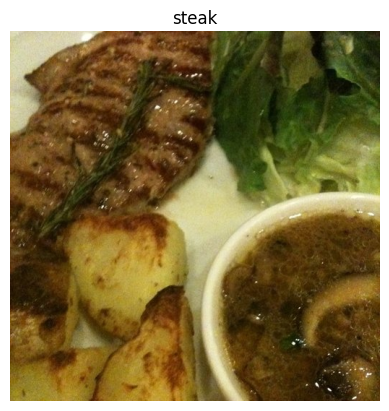

In [8]:
img=view_random_image("pizza_steak/train/",'steak')

In [9]:
image_files = os.listdir("pizza_steak/train/pizza")

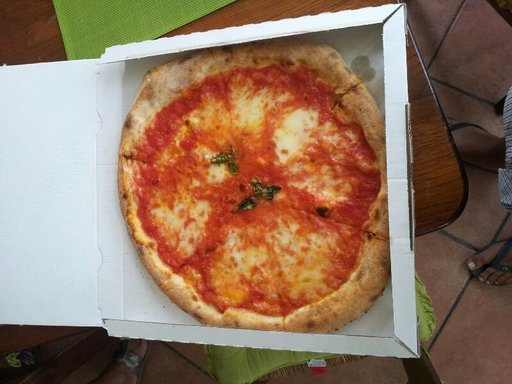

In [10]:
from IPython.display import Image # another way of importing or visualise data

# Specify the filename of the image you want to display
image_filename = '2428085.jpg'

# Create the full path to the image
image_path = os.path.join("pizza_steak/train/pizza", image_filename)

# Display the image
Image(image_path)


In [11]:
img

array([[[224, 217, 189],
        [224, 217, 189],
        [222, 217, 187],
        ...,
        [ 43,  32,  14],
        [ 40,  29,  11],
        [ 40,  29,  11]],

       [[220, 213, 185],
        [220, 213, 184],
        [221, 216, 186],
        ...,
        [ 42,  31,  13],
        [ 43,  32,  14],
        [ 42,  31,  13]],

       [[217, 210, 181],
        [218, 211, 182],
        [219, 214, 184],
        ...,
        [ 45,  33,  17],
        [ 47,  35,  19],
        [ 43,  31,  15]],

       ...,

       [[145, 121,  47],
        [152, 129,  53],
        [150, 127,  47],
        ...,
        [ 90,  59,  13],
        [ 86,  53,  10],
        [ 84,  51,   8]],

       [[151, 124,  53],
        [154, 128,  54],
        [154, 128,  51],
        ...,
        [101,  70,  24],
        [ 99,  66,  23],
        [ 96,  63,  20]],

       [[151, 124,  53],
        [150, 124,  50],
        [153, 127,  52],
        ...,
        [ 97,  66,  20],
        [ 95,  62,  19],
        [ 94,  61,  18]]

In [12]:
img.shape # with,height,colour channels

(512, 512, 3)

In [13]:
#turing into tensors is important but also for neural networks scaling it or normlising it is also important that is between 0 and 1

img/255.

array([[[0.87843137, 0.85098039, 0.74117647],
        [0.87843137, 0.85098039, 0.74117647],
        [0.87058824, 0.85098039, 0.73333333],
        ...,
        [0.16862745, 0.1254902 , 0.05490196],
        [0.15686275, 0.11372549, 0.04313725],
        [0.15686275, 0.11372549, 0.04313725]],

       [[0.8627451 , 0.83529412, 0.7254902 ],
        [0.8627451 , 0.83529412, 0.72156863],
        [0.86666667, 0.84705882, 0.72941176],
        ...,
        [0.16470588, 0.12156863, 0.05098039],
        [0.16862745, 0.1254902 , 0.05490196],
        [0.16470588, 0.12156863, 0.05098039]],

       [[0.85098039, 0.82352941, 0.70980392],
        [0.85490196, 0.82745098, 0.71372549],
        [0.85882353, 0.83921569, 0.72156863],
        ...,
        [0.17647059, 0.12941176, 0.06666667],
        [0.18431373, 0.1372549 , 0.0745098 ],
        [0.16862745, 0.12156863, 0.05882353]],

       ...,

       [[0.56862745, 0.4745098 , 0.18431373],
        [0.59607843, 0.50588235, 0.20784314],
        [0.58823529, 0

Now we have to do it for all the 750 images that turning into number and then normalising it but in tensorflow acutully gives a functionality for this

In [14]:
import tensorflow as tf

# Bulid CNN to find Patterns in our images


📖 Resource: The architecture we're using below is a scaled-down version of VGG-16, a convolutional neural network which came 2nd in the 2014 ImageNet classification competition.train data (750 + 750 )=1500/32(batch) =47

In [15]:

from keras.src.metrics.probabilistic_metrics import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed = 42

#preprocees data to get all the pixel value between 0 and 1
train_datagen=ImageDataGenerator(rescale = 1./255)
valid_datagen=ImageDataGenerator(rescale = 1./255)
# path directories

train_dir ="pizza_steak/train/"
test_dir ="pizza_steak/test/"
#import data from directories and turn them into batches
train_data =train_datagen.flow_from_directory(train_dir,batch_size = 32,target_size = (224,224),class_mode='binary',seed =42)# number of images to process at a time,convert all images to be 224 x 224,type of problem we're working on
valid_data =valid_datagen.flow_from_directory(test_dir,batch_size = 32,target_size = (224,224),class_mode='binary',seed =42)


#Bulid a CNN model
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])
#complie model
model_1.compile(loss ="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics =  ['accuracy'])

#Fit the model
history_1 = model_1.fit(train_data, epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 151ms/step - loss: 0.6775 - accuracy: 0.5700 - val_loss: 0.6016 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.5036 - accuracy: 0.7620 - val_loss: 0.4376 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4249 - accuracy: 0.8120 - val_loss: 0.3540 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3619 - accuracy: 0.8400 - val_loss: 0.3182 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3153 - accuracy: 0.8627 - val_loss: 0.3767 - val_accuracy: 0.8280


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

#Building a computer vision with dense layer not CNN layer and compare

In [17]:
tf.random.set_seed=42

# Create a model to replicate the that we have done beffor for classification and regression
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 130ms/step - loss: 1.2125 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


but the above architure is not improving the accuracy it like a coin toss accuracy ,so we have to imürove the archtiture right

In [18]:
tf.random.set_seed=42

# Create a model to replicate the that we have done beffor for classification and regression
model_3= tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 117ms/step - loss: 3.6333 - accuracy: 0.6300 - val_loss: 0.5575 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.8245 - accuracy: 0.7160 - val_loss: 0.4530 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.7354 - accuracy: 0.7073 - val_loss: 0.5612 - val_accuracy: 0.7040
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5945 - accuracy: 0.7313 - val_loss: 0.6309 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4685 - accuracy: 0.7927 - val_loss: 0.5509 - val_accuracy: 0.7480


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15060551 (57.45 MB)
Trainable params: 15060551 (57.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Breaking down CNN model

In [20]:
#loading the data and make it train and testing data

train_dir ="pizza_steak/train/"
test_dir ="pizza_steak/test/"



In [21]:
#preporocessing data ,turing into pixcel level 0  and 1 also we have to make it batch sizes

# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [24]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

#createing CNN model with tensforflow from the baseline


In [25]:
# simple CNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
Let's discuss some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
filters - these are the number of "feature extractors" that will be moving over our images.
kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end

In [26]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides =1,
           padding ='valid',
           activation = 'relu',
           input_shape =(224,224,3)), #input layer (specify input shape)
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    Flatten(),
    Dense(1,activation = "sigmoid") # output layer (specify output shape)
])

In [27]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [28]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 157ms/step - loss: 0.6557 - accuracy: 0.7020 - val_loss: 0.4362 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3789 - accuracy: 0.8320 - val_loss: 0.3475 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.2642 - accuracy: 0.9053 - val_loss: 0.4267 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.1829 - accuracy: 0.9413 - val_loss: 0.3556 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.0870 - accuracy: 0.9773 - val_loss: 0.3562 - val_accuracy: 0.8440


#evaluating the model

In [29]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 84ms/step - loss: 0.3767 - accuracy: 0.8280


[0.37669044733047485, 0.828000009059906]

In [30]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.3562 - accuracy: 0.8440


[0.35622358322143555, 0.843999981880188]

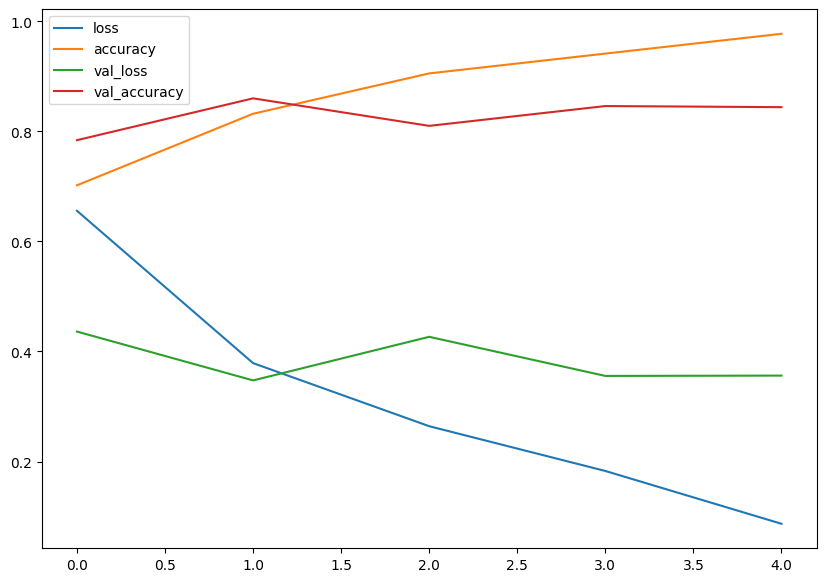

In [31]:

# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

 judging by our loss curves, it looks like our model is overfitting the training dataset.

When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [32]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

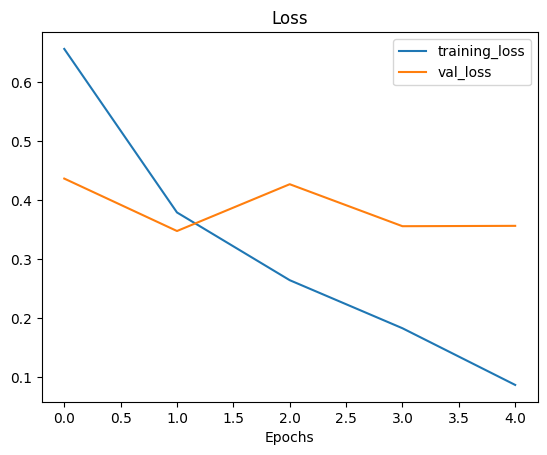

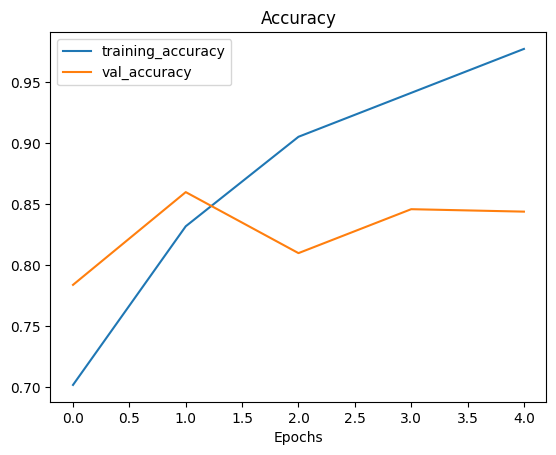

In [33]:
plot_loss_curves(history_4)

The above graph is overfitting

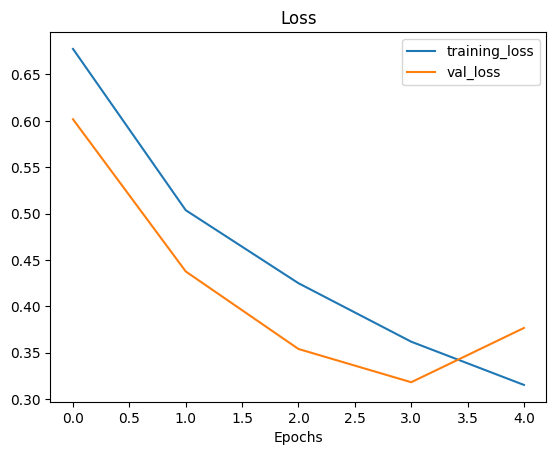

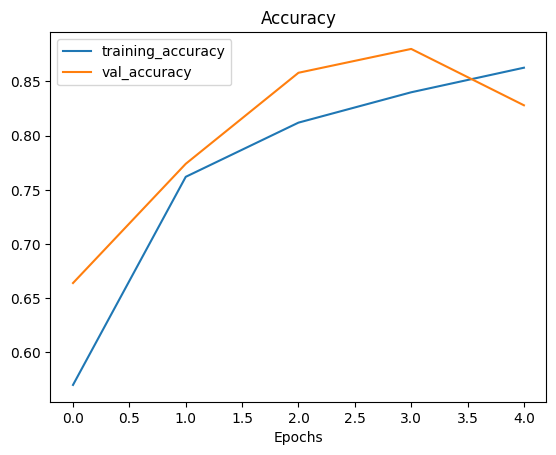

In [34]:
plot_loss_curves(history_1)

the above garph is not overfitting

###why overfitting happens?
Increase the number of convolutional layers.
Increase the number of convolutional filters.
Add another dense layer to the output of our flattened layer.

###Reduce iverfitting
we're going to adjust a number of parameters and inspect the training curves along the way.to avoid overfitting

Namely, we'll build 2 more models:

A ConvNet with max pooling (regularisation)
A ConvNet with max pooling and data augmentation

In [35]:
model_5 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides =1,
           padding ='valid',
           activation = 'relu',
           input_shape =(224,224,3)), #input layer (specify input shape)
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Flatten(),
    Dense(1,activation = "sigmoid") # output layer (specify output shape)
])
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=8,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/8
47/47 [==============================] - 8s 133ms/step - loss: 0.6020 - accuracy: 0.6813 - val_loss: 0.4620 - val_accuracy: 0.8060
Epoch 2/8
47/47 [==============================] - 5s 115ms/step - loss: 0.4784 - accuracy: 0.7913 - val_loss: 0.4212 - val_accuracy: 0.8340
Epoch 3/8
47/47 [==============================] - 6s 132ms/step - loss: 0.4425 - accuracy: 0.8053 - val_loss: 0.3959 - val_accuracy: 0.8260
Epoch 4/8
47/47 [==============================] - 6s 132ms/step - loss: 0.4189 - accuracy: 0.8133 - val_loss: 0.3624 - val_accuracy: 0.8500
Epoch 5/8
47/47 [==============================] - 5s 111ms/step - loss: 0.3766 - accuracy: 0.8393 - val_loss: 0.3452 - val_accuracy: 0.8620
Epoch 6/8
47/47 [==============================] - 5s 117ms/step - loss: 0.3559 - accuracy: 0.8487 - val_loss: 0.3296 - val_accuracy: 0.8560
Epoch 7/8
47/47 [==============================] - 6s 125ms/step - loss: 0.3231 - accuracy: 0.8733 - val_loss: 0.3497 - val_accuracy: 0.8320
Epoch 8/8
47/

In [36]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 107ms/step - loss: 0.3022 - accuracy: 0.8840


[0.3021620810031891, 0.8840000033378601]

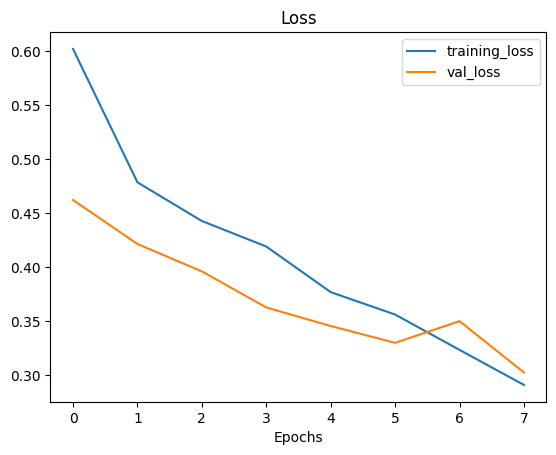

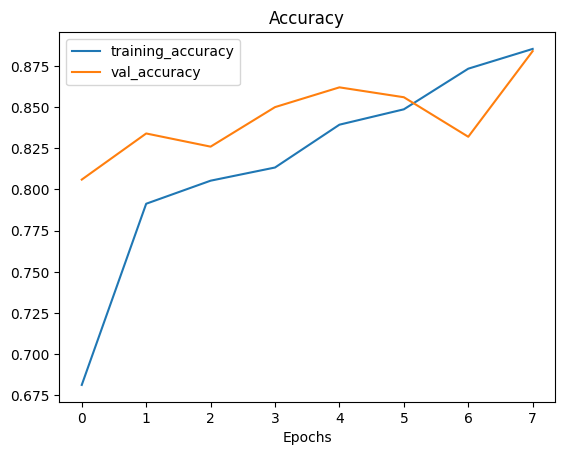

In [37]:
plot_loss_curves(history_5)

We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

###Data agumentation

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

In [38]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [39]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [40]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

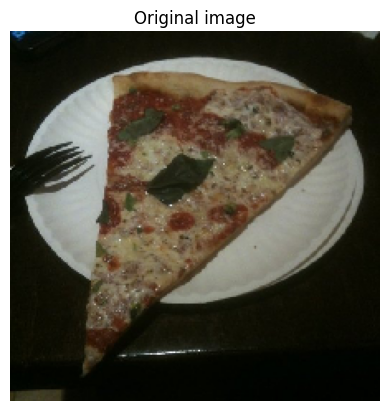

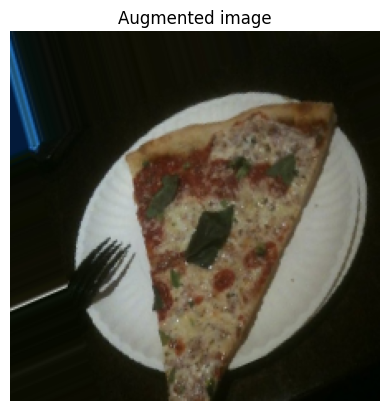

In [41]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [42]:
# Create the model (same as model_5) but with augumented data
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=7,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
47/47 [==============================] - 23s 462ms/step - loss: 0.7096 - accuracy: 0.4887 - val_loss: 0.6860 - val_accuracy: 0.6600
Epoch 2/7
47/47 [==============================] - 20s 431ms/step - loss: 0.6866 - accuracy: 0.5520 - val_loss: 0.6521 - val_accuracy: 0.6760
Epoch 3/7
47/47 [==============================] - 21s 458ms/step - loss: 0.6688 - accuracy: 0.6067 - val_loss: 0.6002 - val_accuracy: 0.7380
Epoch 4/7
47/47 [==============================] - 21s 451ms/step - loss: 0.6355 - accuracy: 0.6307 - val_loss: 0.6185 - val_accuracy: 0.5720
Epoch 5/7
47/47 [==============================] - 21s 452ms/step - loss: 0.5905 - accuracy: 0.6767 - val_loss: 0.5370 - val_accuracy: 0.7520
Epoch 6/7
47/47 [==============================] - 21s 457ms/step - loss: 0.6251 - accuracy: 0.6827 - val_loss: 0.5164 - val_accuracy: 0.8180
Epoch 7/7
47/47 [==============================] - 20s 431ms/step - loss: 0.5716 - accuracy: 0.7307 - val_loss: 0.5010 - val_accuracy: 0.7300


In [43]:
model_6.evaluate(test_data)

16/16 [==============================] - 2s 118ms/step - loss: 0.5010 - accuracy: 0.7300


[0.5009841322898865, 0.7300000190734863]

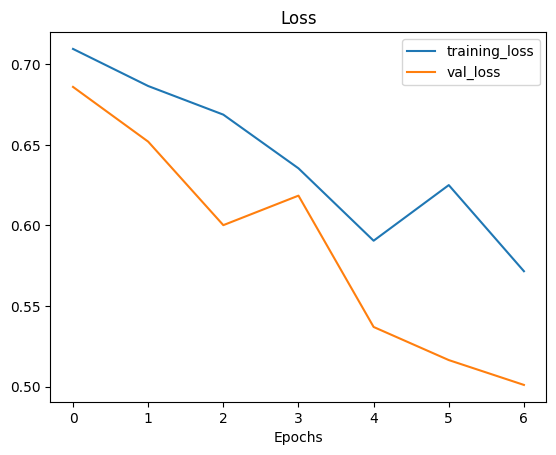

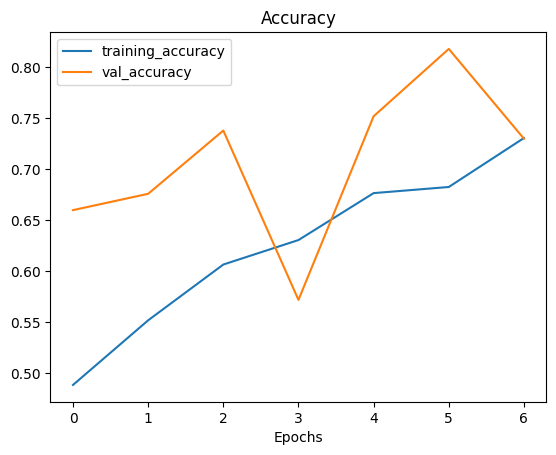

In [44]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

when the model is trained with augumented data it has to augument as it the model flies it takes eacjd ata and agument which uses more computational power
and alsp the above model is not having good accuracy this is may be because we had made the mdoel to learn more difficult

and also we havnt change shuffle = False now we turn into True.


In [45]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [46]:
# Create the model (same as model_6) but with augumented data with shuffle = True
model_7= Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7= model_7 .fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 434ms/step - loss: 0.5282 - accuracy: 0.7420 - val_loss: 0.4613 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5438 - accuracy: 0.7400 - val_loss: 0.4318 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5147 - accuracy: 0.7500 - val_loss: 0.4706 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 20s 432ms/step - loss: 0.5178 - accuracy: 0.7453 - val_loss: 0.4258 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4981 - accuracy: 0.7747 - val_loss: 0.3852 - val_accuracy: 0.8420


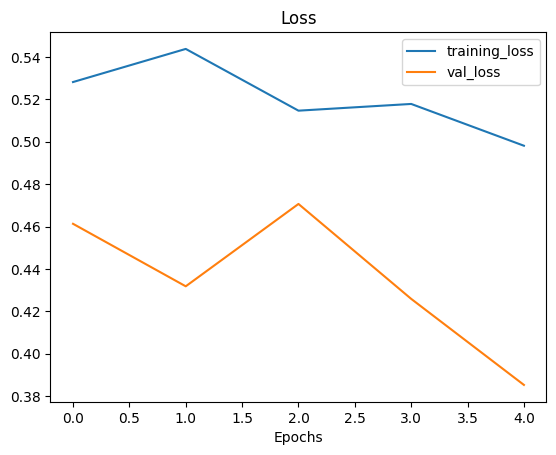

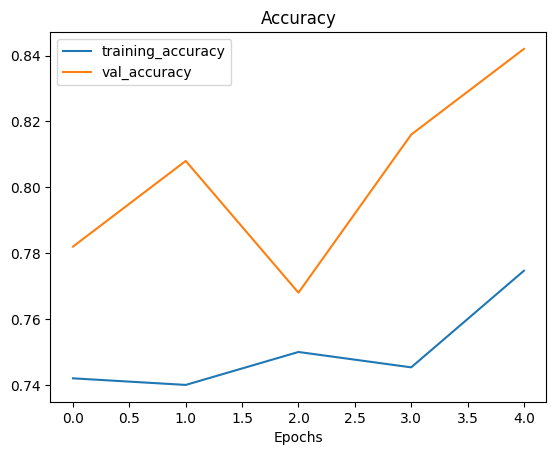

In [47]:
plot_loss_curves(history_7)

#Making Prediction by giving our own steak or Pizza pictures

In [56]:
import matplotlib.image as mpimg
steak= mpimg.imread('/content/steak_pic.jpg')

(-0.5, 1599.5, 1199.5, -0.5)

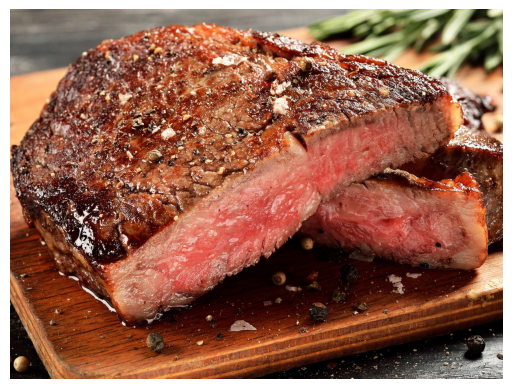

In [57]:
plt.imshow(steak)
plt.axis(False)

In [58]:
steak.shape # its a large image so we have to reduce the image into the modle that we have create that a batch size as well not onlyheight width and colour

(1200, 1600, 3)

In [59]:
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
steak.shape #1 here is sthe batch size

TensorShape([1, 1200, 1600, 3])

but the batch size is there but we want it to be 224 *224 so we have to change it


In [63]:
from PIL import Image
import numpy as np

def load_and_resize_image(image_path, target_shape=(224, 224, 3)):
    # Open the image using Pillow
    img = Image.open(image_path)

    # Resize the image to the target shape
    img = img.resize(target_shape[:2], Image.ANTIALIAS)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    return img_array

# Example usage:
image_path = '/content/steak_pic.jpg'  # Change this to the path of your image
resized_image = load_and_resize_image(image_path)
print(resized_image.shape)  # This should print (224, 224, 3)


(224, 224, 3)


<ipython-input-63-248debda9959>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_shape[:2], Image.ANTIALIAS)


In [66]:
steak = tf.expand_dims(resized_image, axis=0) # add an extra dimension at axis 0
steak.shape

TensorShape([1, 224, 224, 3])

In [77]:
pred = model_7.predict(steak)

1/1 [==============================] - 0s 44ms/step


In [68]:
pred

array([[0.9999895]], dtype=float32)

 the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

In [69]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

now we make a functon so that we can resize add dimension a predict with the image

In [71]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_resize_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

<ipython-input-63-248debda9959>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_shape[:2], Image.ANTIALIAS)


1/1 [==============================] - 0s 106ms/step


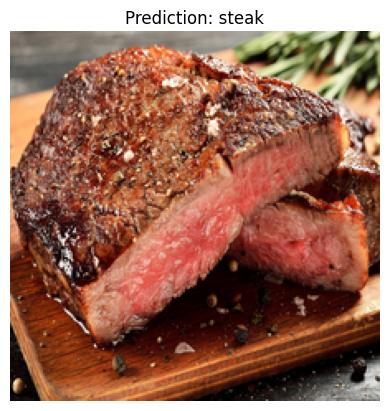

In [74]:
pred_and_plot(model_7,'/content/steak_pic.jpg',class_names)

1/1 [==============================] - 0s 32ms/step


<ipython-input-63-248debda9959>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_shape[:2], Image.ANTIALIAS)


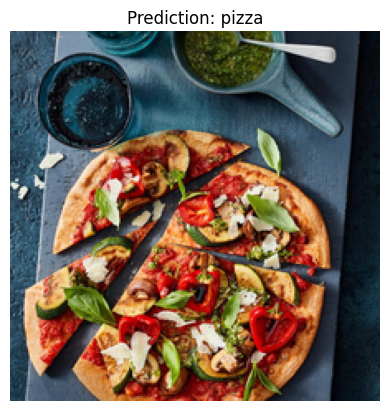

In [83]:
pred_and_plot(model_7,'/content/pizza_pic.jpg',class_names)

#Saving the data

In [ ]:
model_7.save('saved_trained_model_7')